In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from math import pi, sin, cos
from roboticstoolbox import DHRobot, RevoluteDH
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from shapesimilarity import shape_similarity

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from datetime import datetime

## Tạo robot

In [3]:


rC1=np.array([-240.46, -2.28, -139.25])/1000
rC2=np.array([-0.01, 213.35, 146.34])/1000
rC3=np.array([-37.92, 56.60, 29.73])/1000
rC4=np.array([-10.80, 0.36, 59.50])/1000
rC5=np.array([13.60, -114.15, -99.62])/1000

I1=np.array([16276348.15, 59567274.21, 72097187.65,0,0,0])/1e9
I2=np.array([13060964.16, 43498149.19, 7849056.42,0, 0, 0])/1e9
I3=np.array([8488723.47, 15197458.26, 17151274.34,0, 0, 0])/1e9
I4=np.array([998622.53, 2297521.13, 2606582.33,0, 0, 0])/1e9
I5=np.array([2680533.00, 10713275.00, 11512705.79,0, 0, 0])/1e9

m1=8491.07/1000;
m2=4423.53/1000;
m3=1970.11/1000;
m4=464.63/1000;
m5=1401.88/1000

d1=210/1000; d3=336/1000; d5=240/1000;

# T01=DH(q1,d1,0,90);
# T12=DH(q2-pi/2,0,0,-90);
# T23=DH(q3,d3,0,90);
# T34=DH(q4,0,0,-90);
# T45=DH(q5,d5,0,90);


# d1=125.5
a1=0
alpha1=pi/2

d2=0
a2=0
alpha2=-pi/2

# d3=340
a3=0
alpha3=pi/2

d4=0
a4=0
alpha4=-pi/2

# d5=270
a5=0
alpha5=pi/2

# canh tay do (DH mới)
L1 = RevoluteDH(a=0, d=125.5, alpha=pi/2)
L2 = RevoluteDH(a=0, d=0, alpha=-pi/2)
L3 = RevoluteDH(a=0, d=340, alpha=-pi/2)
L4 = RevoluteDH(a=0, d=0, alpha=pi/2)
L5 = RevoluteDH(a=0, d=270, alpha=pi/2)

robot = DHRobot([L1, L2, L3, L4, L5],name='Huy',gravity=[0,0,9.81])
robot = DHRobot([L1, L2, L3, L4, L5],name='exos5',gravity=[0,0,9.81])
robot

DHRobot: exos5, 5 joints (RRRRR), dynamics, standard DH parameters
┏━━━━┳━━━━━━━┳━━━━┳━━━━━━━━┓
┃θⱼ  ┃  dⱼ   ┃ aⱼ ┃   ⍺ⱼ   ┃
┣━━━━╋━━━━━━━╋━━━━╋━━━━━━━━┫
┃ q1 ┃ 125.5 ┃  0 ┃  90.0° ┃
┃ q2 ┃     0 ┃  0 ┃ -90.0° ┃
┃ q3 ┃   340 ┃  0 ┃ -90.0° ┃
┃ q4 ┃     0 ┃  0 ┃  90.0° ┃
┃ q5 ┃   270 ┃  0 ┃  90.0° ┃
┗━━━━┻━━━━━━━┻━━━━┻━━━━━━━━┛

In [4]:
n_dmp = '10'
type_dmp = 'random'
action = 'uong'
# title = {'db': 'Động tác đánh bóng', 'lay': 'Động tác lấy nước', 'uong': " Động tác uống nước"}
title = {'db': 'Playing ball task', 'lay': 'Reaching a cup task', 'uong': " Drinking water task"}



In [9]:
def trajectorysimilarity(a,b):
#     a,b = x

    x = np.linspace(1, -1, num=50)
    a = np.column_stack((x, a))
    b = np.column_stack((x, b))
    return shape_similarity(a,b)

In [10]:
# n_dmps = ['10', '1']
# type_dmps = ['','random']
# actions = ['lay', 'db', 'uong']

n_dmps = ['10']
type_dmps = ['random']
actions = [ 'lay','db','uong']

for action in tqdm(actions):
    for type_dmp in tqdm(type_dmps):
        for n_dmp in tqdm(n_dmps):
            pass
#             plot_results(n_dmp, type_dmp, action)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
f'data/result_de/{action}/de_test_{n_dmp}.txt'

'data/result_de/uong/de_test_10.txt'

In [15]:
def plot_results(n_dmp, type_dmp, action):
    print(f'================{title[action]} with {n_dmp} dmps - {type_dmp} ================ ')
    y= np.load(f'data/train/{action}/q_dmps_{action}_{n_dmp}_gen_25.npy')
    X= np.load(f'data/train/{action}/E_q_dmps_{action}_{n_dmp}_gen_25.npy')/1000
    if type_dmp == 'random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.05,random_state= 112)
    else:
        n=4980
        X_train = X[:n]
        X_test = X[n:]
        y_train = y[:n]
        y_test = y[n:]


    #load model 
    model = keras.models.load_model(f'weights/{action}/exos_5q_{action}_{n_dmp}_2000_gen_25_{type_dmp}.h5')
    y_pred = model.predict(X_test)
    
    
    #plot results
    plt.rcdefaults() 
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.rcParams.update({'font.size': 35})
    plt.rcParams["font.family"] = "Times New Roman"
    x= range(y_test.shape[1])
    n= 5
    y=y_pred[n]
    y_t=y_test[n]
    colors = ['r', 'g', 'b', 'm', 'k']
    linestyles = ['-', ':', '--', '-.', (0, (3, 1, 1, 1, 1, 1))]

    plt.figure(figsize = (20,12),dpi = 100)
    for i in range(y.shape[-1]):
        plt.plot(x,(y_t[:,i])*180/np.pi, label = f"q{i+1} desire",  color=colors[i],linewidth=3, linestyle=linestyles[0])
        
    for i in range(y.shape[-1]):
        plt.plot(x,(y[:,i])*180/np.pi, label = f"q{i+1} predicted",  color=colors[i],linewidth=3, linestyle=linestyles[1])

    plt.legend()
    plt.title(title[action], weight='bold')
    plt.xlabel("Points")
    plt.ylabel("Joint values (°)")
    plt.grid()
    #plt.show()
    plt.savefig(f"plot_pp/{action}/q_compare_{n_dmp}_{type_dmp}.jpg")

    

    plt.figure(figsize = (20,12), dpi = 100)
    
    for i in range(y.shape[-1]):
        plt.plot(x,np.abs(y[:,i] - y_t[:,i])*180/np.pi, label = f"q{i+1}",  color=colors[i],linewidth=3, linestyle=linestyles[i])
    plt.legend()
    plt.title(title[action], weight='bold')
    plt.xlabel("Points")
    plt.ylabel("Joint values error (°)")
    plt.grid()
    #plt.show()
    plt.savefig(f"plot_pp/{action}/q_error_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_pp/{action}/q_error_{n_dmp}_{type_dmp}.svg")

    
    plt.figure(figsize = (20,12),dpi = 100)
    erorr= (robot.fkine(y).t-X_test[n]*1000)
    ey = ['X','Y','Z']
    for i in range(erorr.shape[-1]):
        plt.plot(x,np.abs(erorr[:,i]), label = f"{ey[i]} - axis  ",  color=colors[i],linewidth=3, linestyle=linestyles[i])
    plt.legend()
    plt.title(title[action], weight='bold')
    plt.xlabel("Axis")
    plt.ylabel("Position error (mm)")
    plt.grid()
    #plt.show()
    plt.savefig(f"plot_pp/{action}/dis_error_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_pp/{action}/dis_error_{n_dmp}_{type_dmp}.svg")
    

    SMALL_SIZE = 20
    MEDIUM_SIZE = 20
    BIGGER_SIZE =30

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
#     plt.rc('title', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.facecolor'] = 'white'

    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize = (16,12),dpi =100)
    ax = fig.add_subplot(111, projection='3d')
    #     plt.rcdefaults() 
    plt.title(title[action], weight='bold')

    ax.set_facecolor("white")

    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    E= X_test[n]*1000
    Ep = robot.fkine(y).t
    ax.scatter3D(E[:, 0], E[:, 1], E[:, 2], color='b', label = 'Desired trajectory')
    ax.scatter3D(Ep[:, 0], Ep[:, 1], Ep[:, 2], color='r', label = 'Predicted trajectory')
    # Đặt màu nền trắng cho đồ thị 3D
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    plt.legend()
    #plt.show()
    plt.savefig(f"plot_pp/{action}/endpoints_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_pp/{action}/endpoints_{n_dmp}_{type_dmp}.svg")

    


In [23]:
def plot_box_results(n_dmp, type_dmp, action):
    print(f'================{title[action]} with {n_dmp} dmps - {type_dmp} ================ ')
    y= np.load(f'data/train/{action}/q_dmps_{action}_{n_dmp}_gen_25.npy')
    X= np.load(f'data/train/{action}/E_q_dmps_{action}_{n_dmp}_gen_25.npy')/1000
    if type_dmp == 'random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.05,random_state= 112)
#         X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size= 0.2,random_state= 112)
        
    else:
        n=4980
        X_train = X[:n]
        X_test = X[n:]
        y_train = y[:n]
        y_test = y[n:]


    #load model 
    model = keras.models.load_model(f'weights/{action}/exos_5q_{action}_{n_dmp}_2000_gen_25_{type_dmp}.h5')
    y_pred = model.predict(X_test)
    y_error_mean = np.mean(np.abs(y_pred-y_test), axis=1)

    #plot results
    plt.rcdefaults() 
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.rcParams.update({'font.size':30})
    plt.rcParams["font.family"] = "Times New Roman"
    x= range(y_test.shape[1])
    n= 5
    
    
    
    plt.figure(figsize = (16,12),dpi = 100)
    erorr= np.abs(robot.fkine(y_pred[:,-1,:]).t-X_test[:,-1,:]*1000)
    
    erorr_mean =  np.mean(erorr, axis=0)
    print(erorr_mean)
    labels = ['X','Y','Z']
    colors = ['r', 'g', 'b']

    box = plt.boxplot(erorr, patch_artist=True)
    plt.xticks([1, 2, 3], labels)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlabel("Axis")
    plt.ylabel("Position error (mm)")
    plt.legend()
    plt.title(title[action], weight='bold')
    plt.grid()
    #     plt.show()
    plt.savefig(f"plot_box/{action}/dis_error_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_box/{action}/dis_error_{n_dmp}_{type_dmp}.svg")
    
    
    plt.figure(figsize = (16,12), dpi = 100)
    labels = ['q1', 'q2', 'q3', 'q4', 'q5']
    colors = ['r', 'g', 'b', 'm', 'k']
    box = plt.boxplot(y_error_mean*180/np.pi, patch_artist=True)
    print(np.mean(y_error_mean, axis = 0)*180/np.pi)
    plt.xticks([1, 2, 3, 4, 5], labels)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlabel("Joints")
    plt.ylabel("Joint values error (°)")
    plt.legend()
    plt.title(title[action], weight='bold')
    plt.grid()
    #     plt.show()
    plt.savefig(f"plot_box/{action}/q_error_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_box/{action}/q_error_{n_dmp}_{type_dmp}.svg")


    df =pd.DataFrame()

    df['Độ tương tự q1']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,0], y_test[:,:,4]))
    df['Độ tương tự q2']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,1], y_test[:,:,4]))
    df['Độ tương tự q3']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,2], y_test[:,:,4]))
    df['Độ tương tự q4']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,3], y_test[:,:,4]))
    df['Độ tương tự q5']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,4], y_test[:,:,4]))
    print(df.describe())
    plt.figure(figsize = (16,12),dpi = 100)

    labels = ['q1', 'q2', 'q3', 'q4', 'q5']
    colors = ['r', 'g', 'b', 'm', 'k']
    box = plt.boxplot(df, patch_artist=True)
    plt.xticks([1, 2, 3, 4, 5], labels)
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.xlabel("Joints")
    plt.ylabel("Similarity")
    plt.legend()
    plt.title(title[action], weight='bold')
    plt.grid()
    #     plt.show()
    plt.savefig(f"plot_box/{action}/sim_{n_dmp}_{type_dmp}.jpg")
    plt.savefig(f"plot_box/{action}/sim_{n_dmp}_{type_dmp}.svg")    

================Reaching a cup task with 10 dmps - random ================ 


No handles with labels found to put in legend.


[2.58465764 2.57233302 2.45838299]


No handles with labels found to put in legend.


[0.47332166 0.36822041 0.72839189 0.54196551 3.32843682]


No handles with labels found to put in legend.


       Độ tương tự q1  Độ tương tự q2  Độ tương tự q3  Độ tương tự q4  \
count      250.000000      250.000000      250.000000      250.000000   
mean         0.910348        0.829155        0.747437        0.679871   
std          0.047002        0.091447        0.255005        0.184682   
min          0.776000        0.568500        0.298900        0.091200   
25%          0.884125        0.779525        0.441825        0.553800   
50%          0.918400        0.874050        0.916250        0.709200   
75%          0.944375        0.893700        0.950225        0.804050   
max          0.995200        0.937200        0.995200        0.968700   

       Độ tương tự q5  
count      250.000000  
mean         0.977228  
std          0.012944  
min          0.944900  
25%          0.966400  
50%          0.978400  
75%          0.988000  
max          0.997600  


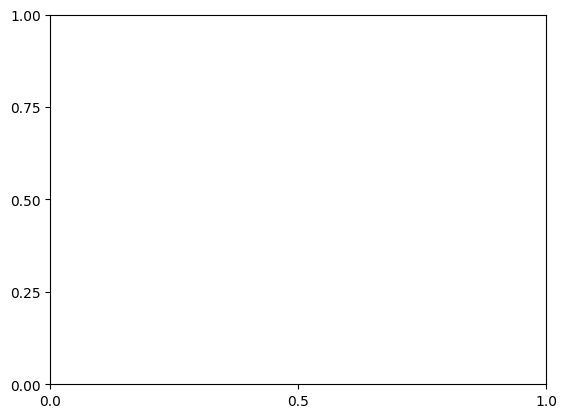

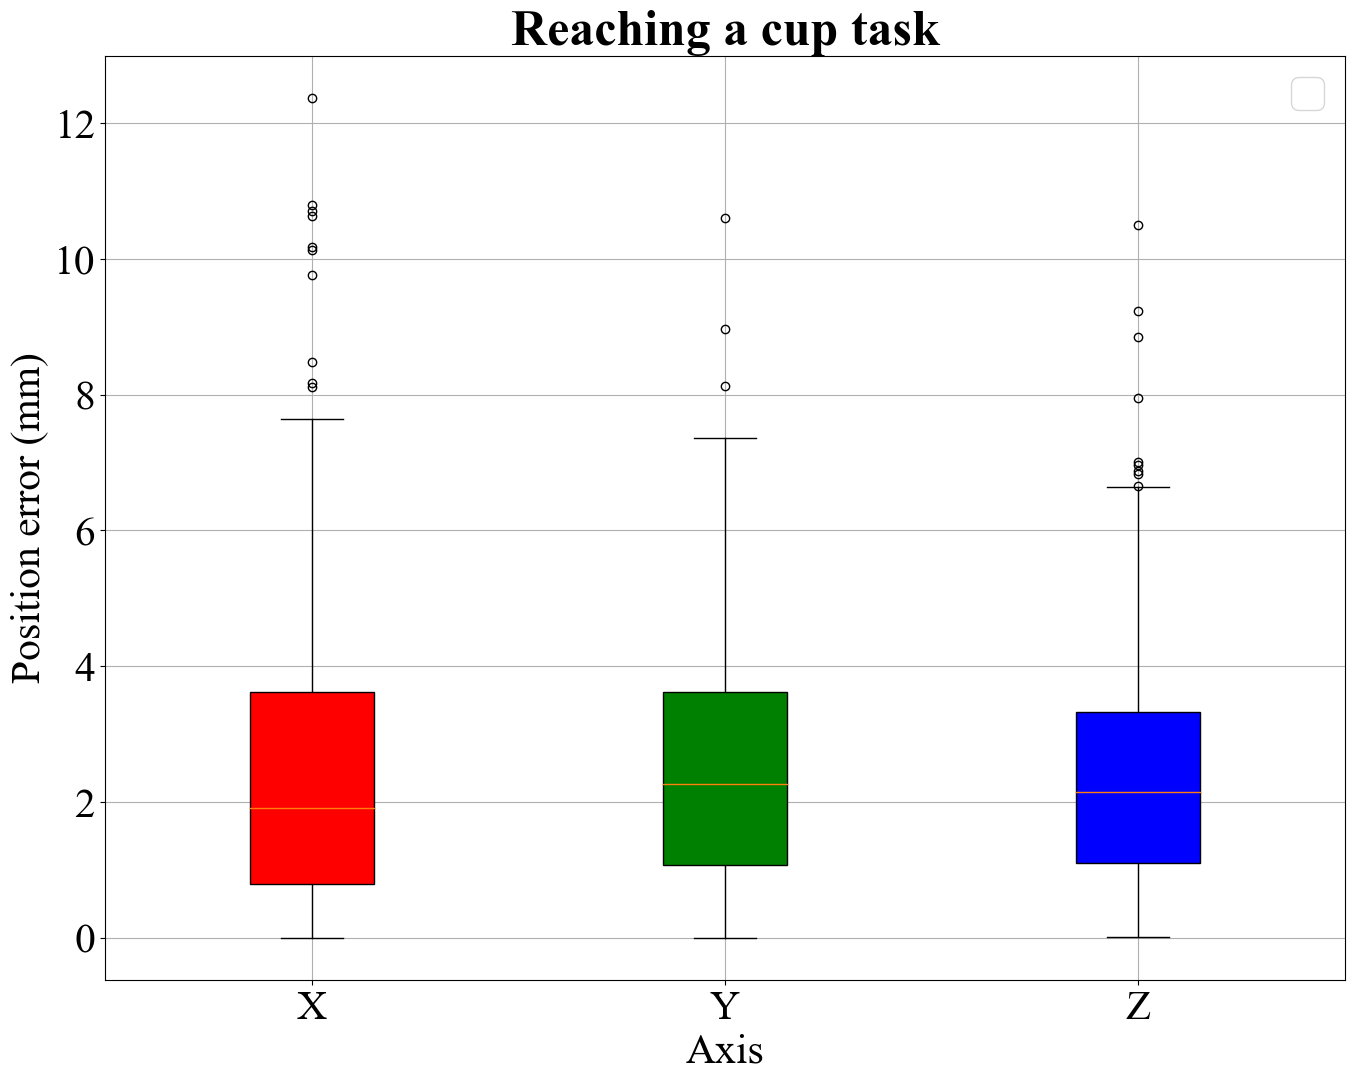

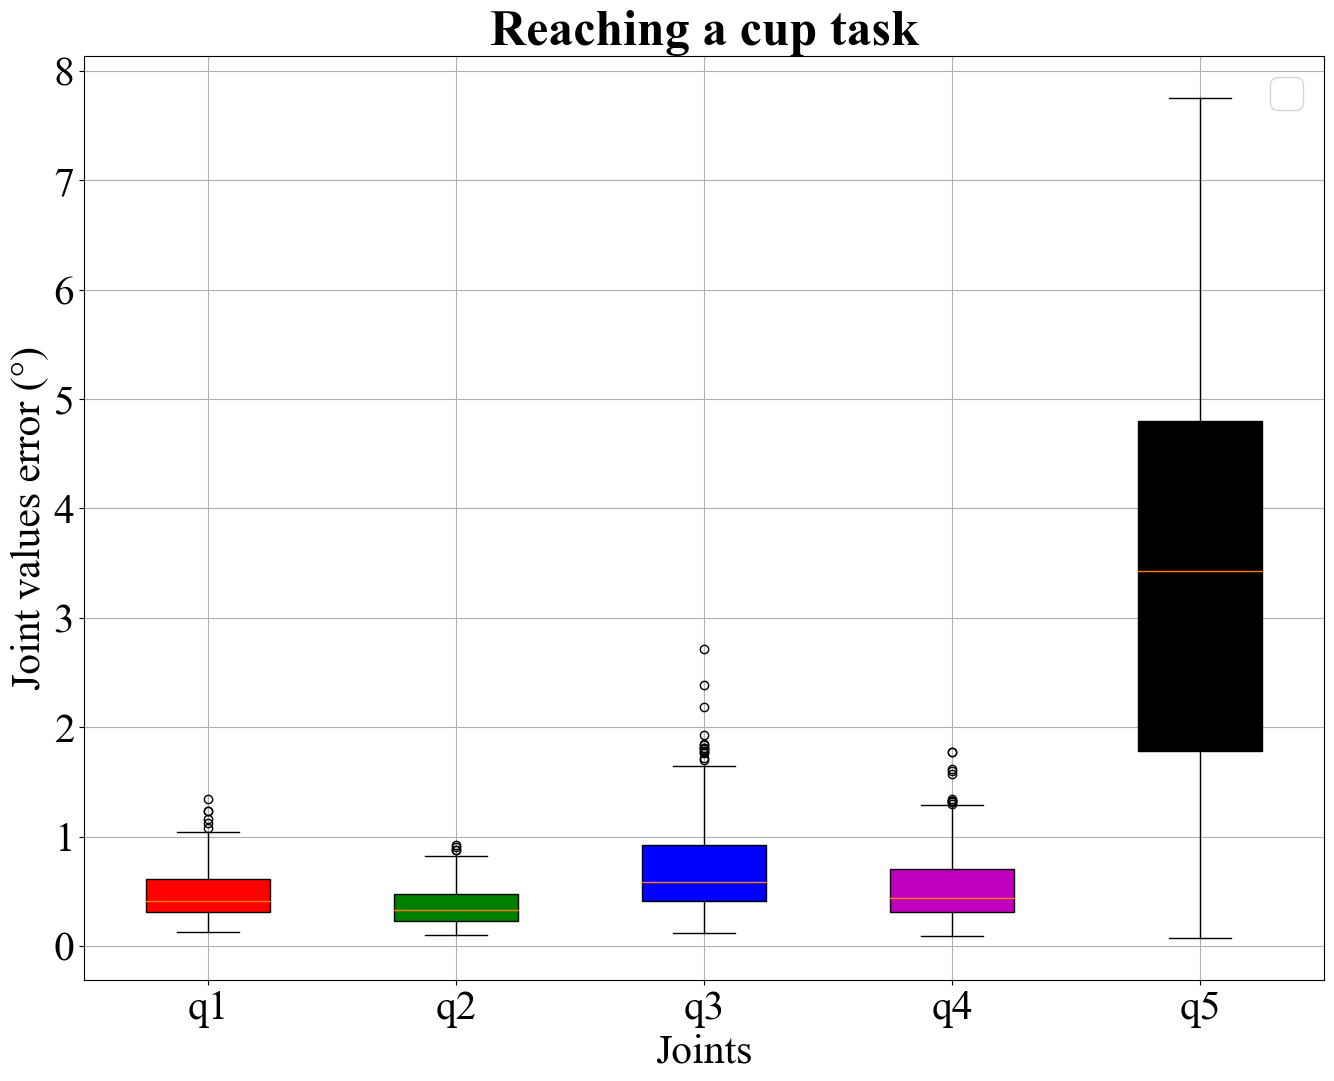

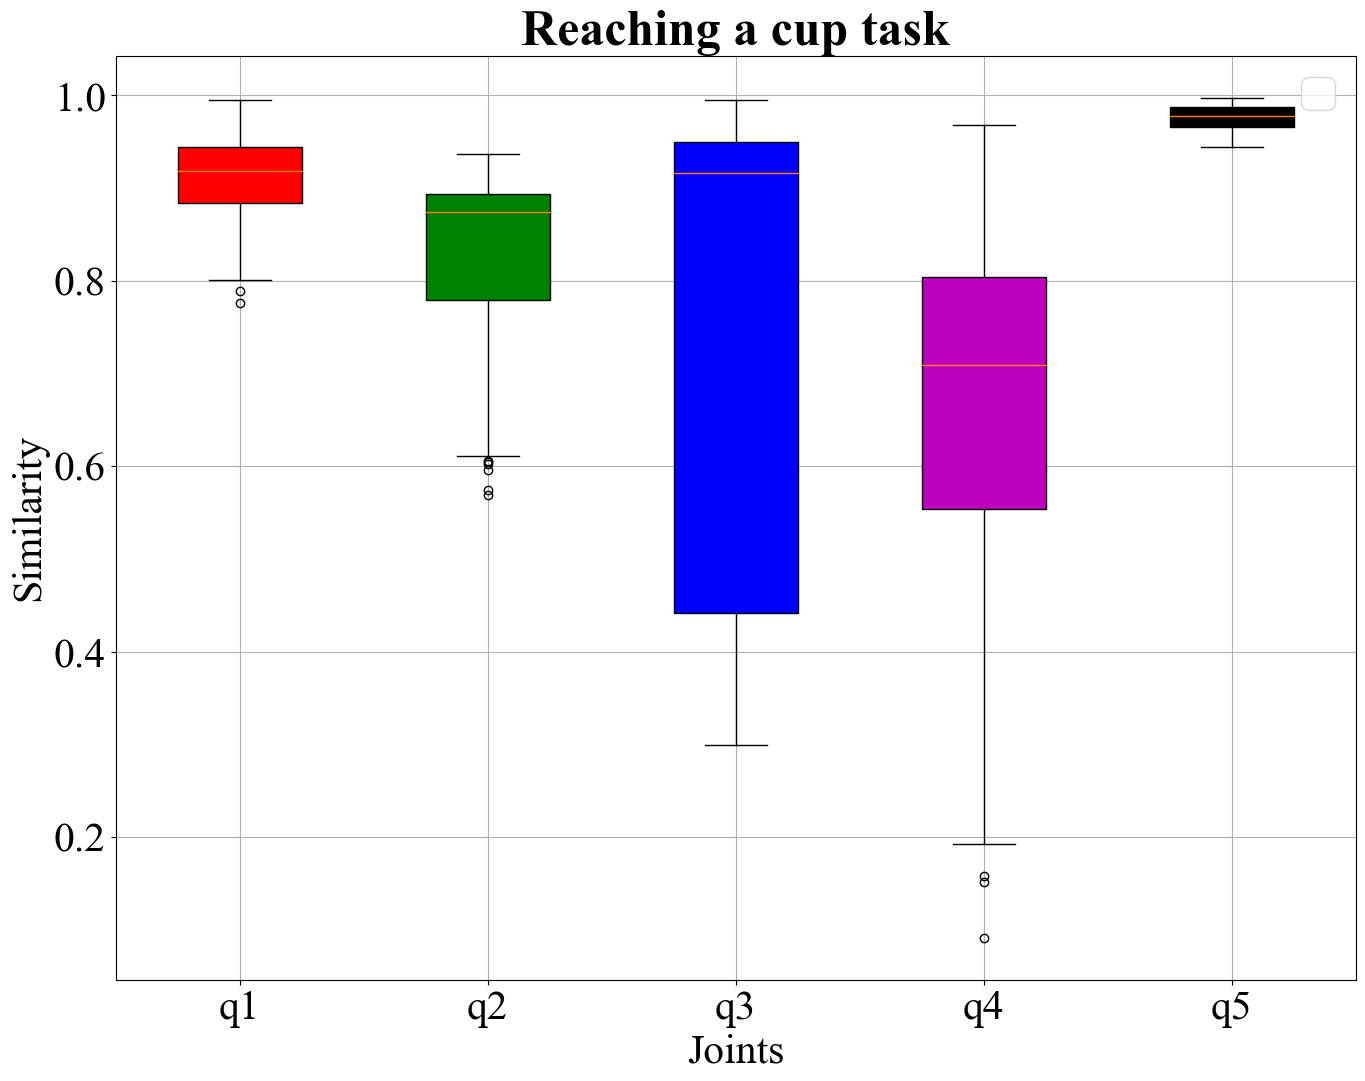

In [24]:
print(f'================{title[action]} with {n_dmp} dmps - {type_dmp} ================ ')
y= np.load(f'data/train/{action}/q_dmps_{action}_{n_dmp}_gen_25.npy')
X= np.load(f'data/train/{action}/E_q_dmps_{action}_{n_dmp}_gen_25.npy')/1000
if type_dmp == 'random':
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.05,random_state= 112)
#         X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size= 0.2,random_state= 112)

else:
    n=4980
    X_train = X[:n]
    X_test = X[n:]
    y_train = y[:n]
    y_test = y[n:]


#load model 
model = keras.models.load_model(f'weights/{action}/exos_5q_{action}_{n_dmp}_2000_gen_25_{type_dmp}.h5')
y_pred = model.predict(X_test)
y_error_mean = np.mean(np.abs(y_pred-y_test), axis=1)

#plot results
plt.rcdefaults() 
ax = plt.axes()
ax.set_facecolor("white")
plt.rcParams.update({'font.size':30})
plt.rcParams["font.family"] = "Times New Roman"
x= range(y_test.shape[1])
n= 5



plt.figure(figsize = (16,12),dpi = 100)
erorr= np.abs(robot.fkine(y_pred[:,-1,:]).t-X_test[:,-1,:]*1000)

erorr_mean =  np.mean(erorr, axis=0)
print(erorr_mean)
labels = ['X','Y','Z']
colors = ['r', 'g', 'b']

box = plt.boxplot(erorr, patch_artist=True)
plt.xticks([1, 2, 3], labels)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel("Axis")
plt.ylabel("Position error (mm)")
plt.legend()
plt.title(title[action], weight='bold')
plt.grid()
#     plt.show()
plt.savefig(f"plot_box/{action}/dis_error_{n_dmp}_{type_dmp}.jpg")
plt.savefig(f"plot_box/{action}/dis_error_{n_dmp}_{type_dmp}.svg")


plt.figure(figsize = (16,12), dpi = 100)
labels = ['q1', 'q2', 'q3', 'q4', 'q5']
colors = ['r', 'g', 'b', 'm', 'k']
box = plt.boxplot(y_error_mean*180/np.pi, patch_artist=True)
print(np.mean(y_error_mean, axis = 0)*180/np.pi)
plt.xticks([1, 2, 3, 4, 5], labels)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel("Joints")
plt.ylabel("Joint values error (°)")
plt.legend()
plt.title(title[action], weight='bold')
plt.grid()
#     plt.show()
plt.savefig(f"plot_box/{action}/q_error_{n_dmp}_{type_dmp}.jpg")
plt.savefig(f"plot_box/{action}/q_error_{n_dmp}_{type_dmp}.svg")


df =pd.DataFrame()
df['Độ tương tự q1']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,0], y_test[:,:,4]))
df['Độ tương tự q2']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,1], y_test[:,:,4]))
df['Độ tương tự q3']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,2], y_test[:,:,4]))
df['Độ tương tự q4']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,3], y_test[:,:,4]))
df['Độ tương tự q5']=list(map(lambda a,b: trajectorysimilarity(a,b),  y_pred[:,:,4], y_test[:,:,4]))
print(df.describe())
plt.figure(figsize = (16,12),dpi = 100)

labels = ['q1', 'q2', 'q3', 'q4', 'q5']
colors = ['r', 'g', 'b', 'm', 'k']
box = plt.boxplot(df, patch_artist=True)
plt.xticks([1, 2, 3, 4, 5], labels)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel("Joints")
plt.ylabel("Similarity")
plt.legend()
plt.title(title[action], weight='bold')
plt.grid()
#     plt.show()
plt.savefig(f"plot_box/{action}/sim_{n_dmp}_{type_dmp}.jpg")
plt.savefig(f"plot_box/{action}/sim_{n_dmp}_{type_dmp}.svg")    

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

================Reaching a cup task with 10 dmps - random ================ 


No handles with labels found to put in legend.


[2.58465764 2.57233302 2.45838299]


TypeError: integer argument expected, got float

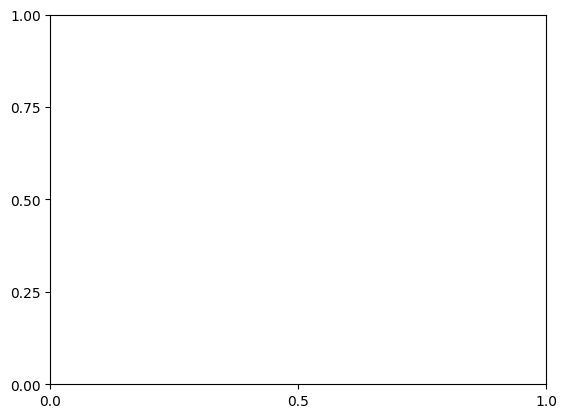

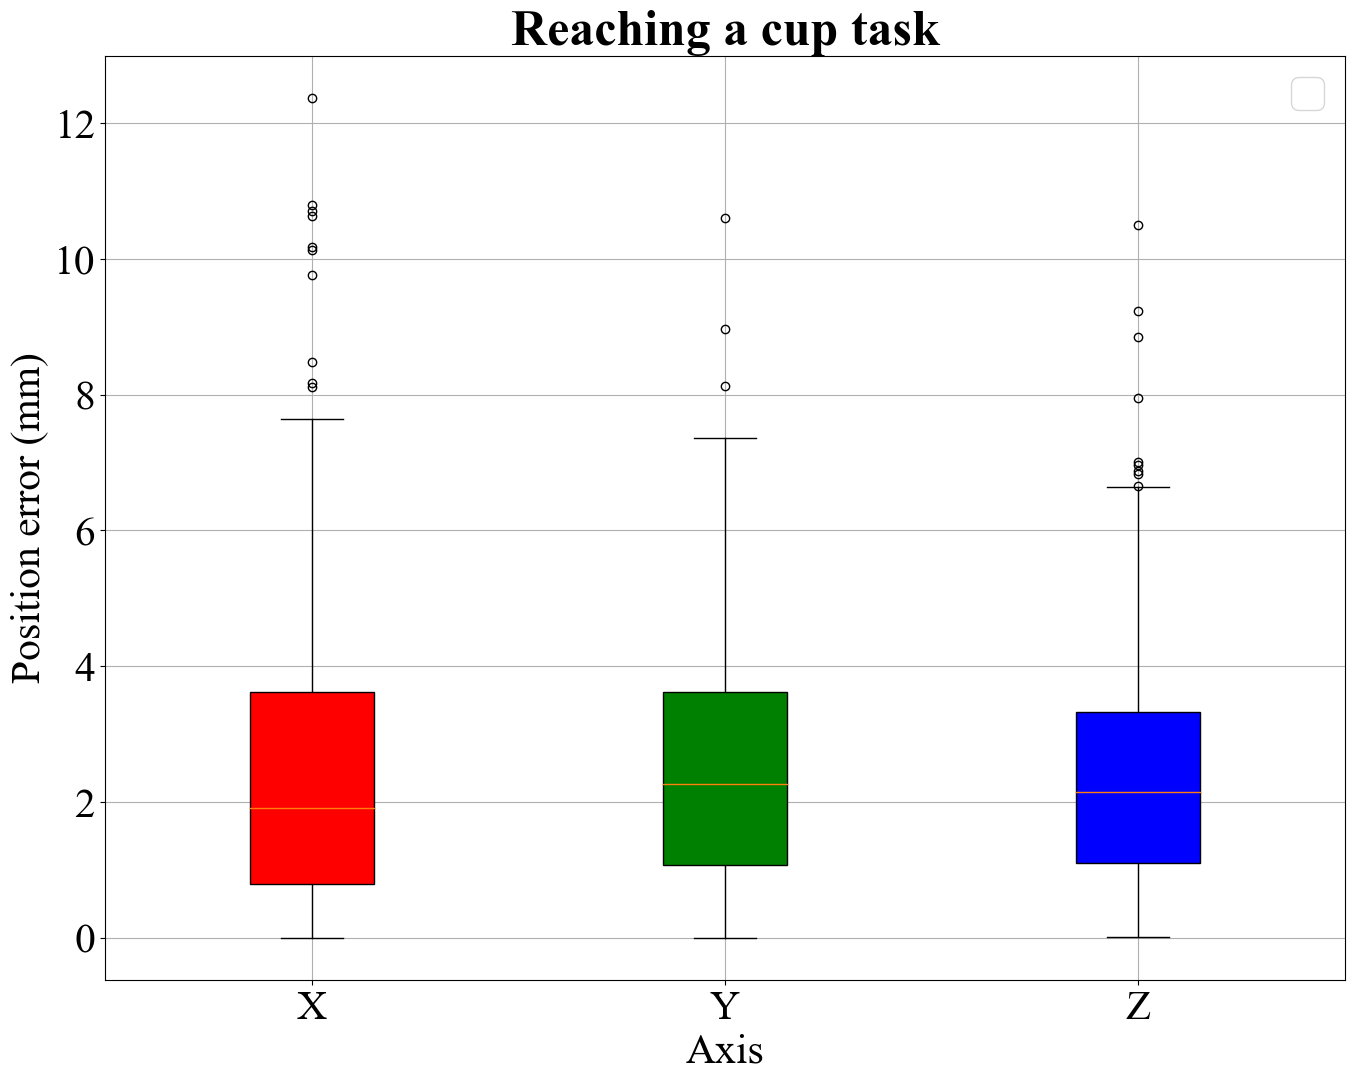

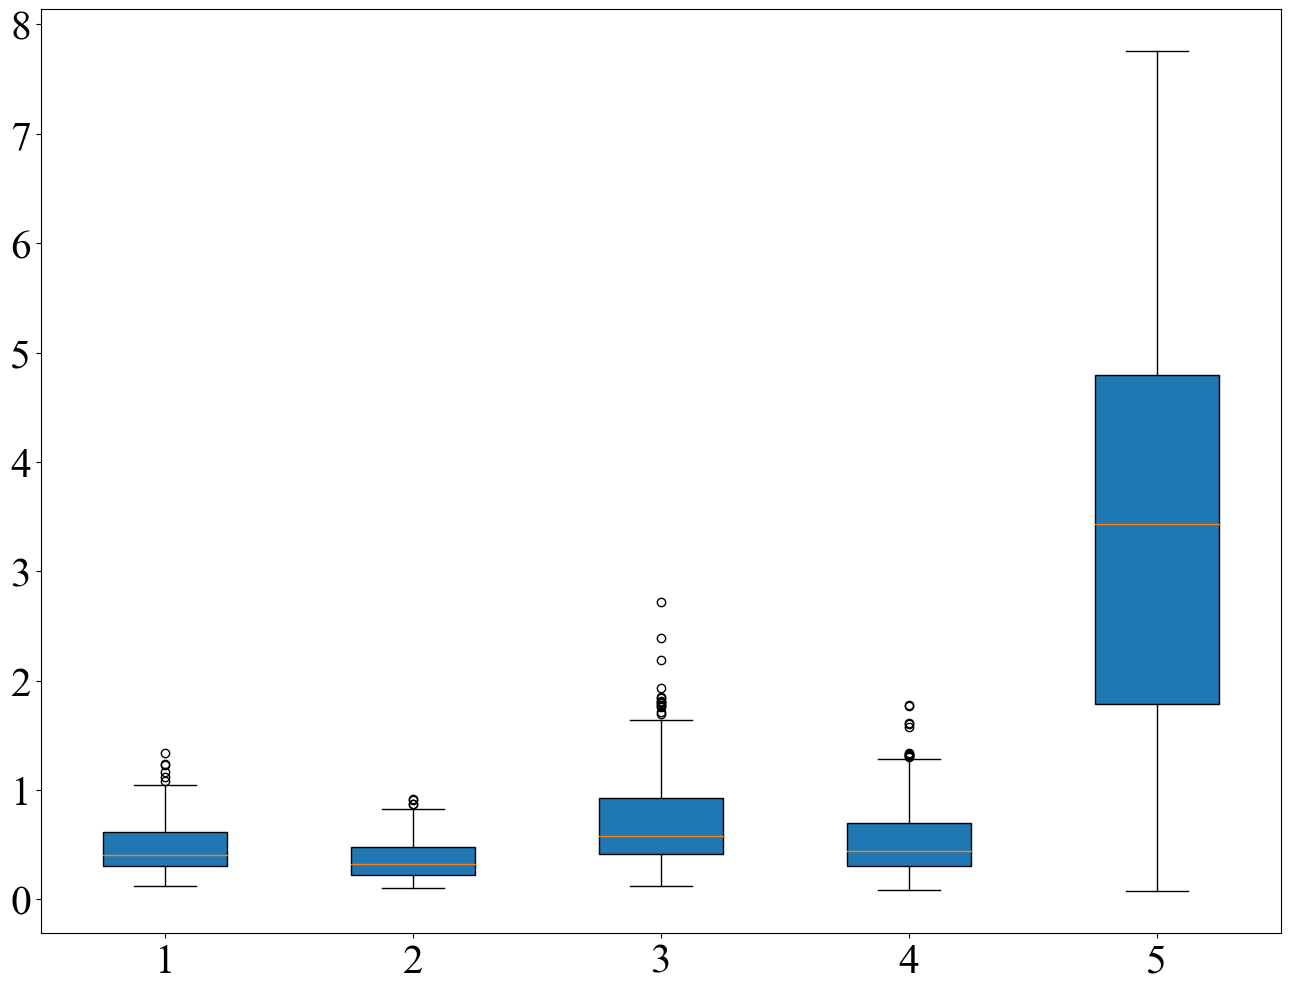

In [ ]:
# n_dmps = ['10']
# type_dmps = ['random']
# actions = [ 'lay','db','uong']

# for action in tqdm(actions):
#     for type_dmp in tqdm(type_dmps):
#         for n_dmp in tqdm(n_dmps):
#             pass
#             plot_box_results(n_dmp, type_dmp, action)


In [70]:
df = df.loc[df['Độ tương tự q1']>0.9 & df['Độ tương tự q2']>0.9 & df['Độ tương tự q3']>0.9 & df['Độ tương tự q4']>0.9 & df['Độ tương tự q5']>0.9]

In [34]:
DE_test = np.loadtxt(f'data/result_de/{action}/de_test_{n_dmp}.txt')
DE_test =DE_test.reshape(30,50,5)
DE_test.shape

(1500, 5)

In [39]:
import spatialmath.base.symbolic as sym
from roboticstoolbox import DHRobot, RevoluteDH, ERobot, ELink, ETS
from math import pi, sin, cos
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from DMP.dmp_discrete import DMPs_discrete
from spatialmath import *
from math import sqrt

def dmp_gen_e(paths, E_qd, robot):
    """"
    E_qd: quỹ đạo mẫu
    n: số lượng quỹ đạo mỗi điểm
    """
    
#     i = np.random.choice(range(len(paths)))
    i=3
    q_do = np.loadtxt(folder + paths[i], dtype = np.float64)*pi/180
    q_do[:,1] = pi/2- q_do[:,1] 
    E_do = robot.fkine(q_do).t

    
    dmp_E=DMPs_discrete(n_dmps=3,n_bfs=100, dt=1/50)
    # dmp cho q
    dmp_E.imitate_path(y_des=E_do.T)
    E_dmps=[]
    for E in tqdm(E_qd):
        # omega_q = dmp_q.w
        dmp_E.y0=E[0,:]
#             Te=robot.fkine(q[-1,:])
        dmp_E.goal= E[-1,:]
        E_track, dE_track, ddE_track = dmp_E.rollout()
        E_dmp = np.array(E_track)
        E_dmps.append(E_dmp)
    return  np.array(E_dmps)
